In [72]:
import pydicom
import os
import numpy
from natsort import natsorted
from matplotlib import pyplot, cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [88]:
PathDicom = "../../_data/dicom/test_data/000"
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in natsorted(fileList):
        if ".dcm" in filename.lower():
            lstFilesDCM.append(os.path.join(dirName, filename))

In [89]:
RefDs = pydicom.read_file(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [90]:
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20170801'
(0008, 0013) Instance Creation Time              TM: '102618'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.250.1.90.2.709154157.20170801102618.14140.16919.1
(0008, 0020) Study Date                          DA: '20170531'
(0008, 0021) Series Date                         DA: '20170801'
(0008, 0022) Acquisition Date                    DA: '20170531'
(0008, 0023) Content Date                        DA: '20170801'
(0008, 0030) Study Time                          TM: '092132'
(0008, 0031) Series Time                         TM: '102618'
(0008, 0032) Acquisition Time                    TM: '092431'
(0008, 0033) Content Time                        TM: '102618'
(0008, 0050) Accession Number             

In [91]:
print(ConstPixelDims)

(715, 715, 468)


In [92]:
print(ConstPixelSpacing)

(0.0765217391, 0.0765217391, 0.076521739)


In [93]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [94]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

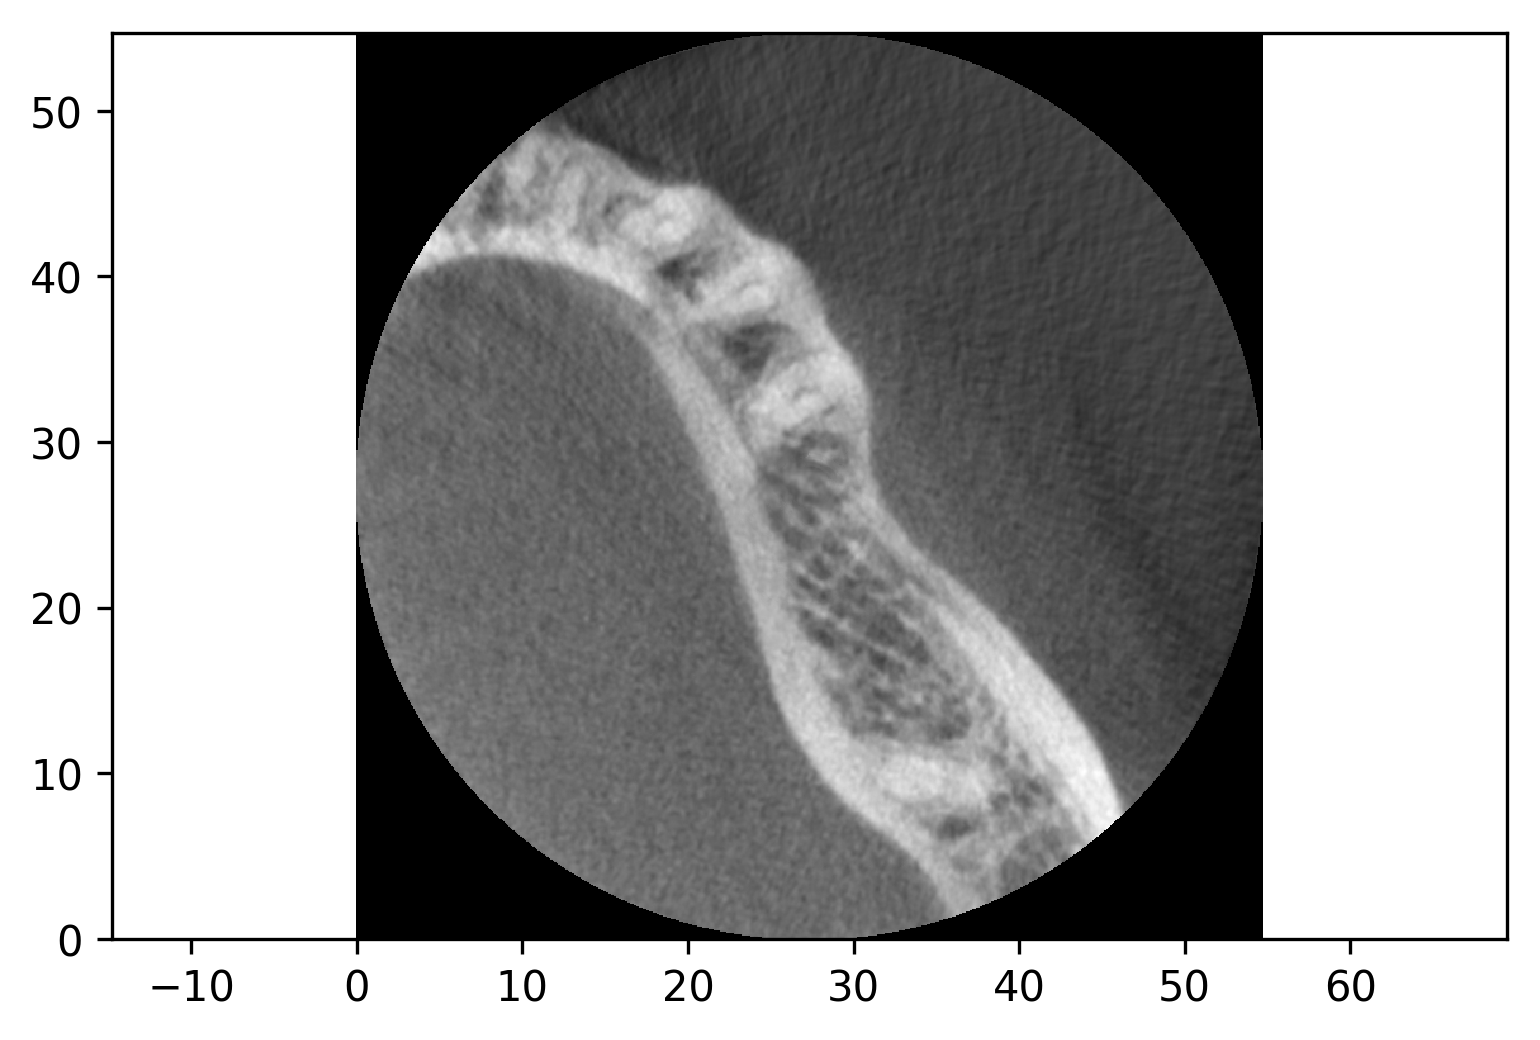

In [100]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 200]))

In [108]:
print(ArrayDicom[:, :, 200][150])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 1581 1645 1573 1497 1421
 1394 1395 1394 1398 1405 1414 1415 1428 1452 1506 1552 1588 1598 1583
 1559 1545 1516 1484 1457 1434 1398 1357 1320 1295 1284 1278 1265 1249
 1253 1243 1244 1273 1311 1343 1377 1388 1371 1356 1339 1320 1304 1280
 1266 1267 1299 1355 1432 1512 1591 1641 1642 1597 1531 1472 1460 1475
 1498 1511 1503 1494 1493 1490 1476 1454 1431 1377 1340 1349 1418 1514
 1571 1602 1633 1666 1684 1684 1660 1625 1564 1538 1547 1611 1695 1786
 1849 1895 1926 1928 1896 1876 1891 1901 1880 1826 1790 1771 1776 1800
 1828 1837 1798 1737 1676 1589 1522 1435 1414 1427 1479 1458 1415 1355
 1358 1385 1373 1352 1335 1374 1389 1405 1418 1447 1453 1473 1455 1423
 1377 

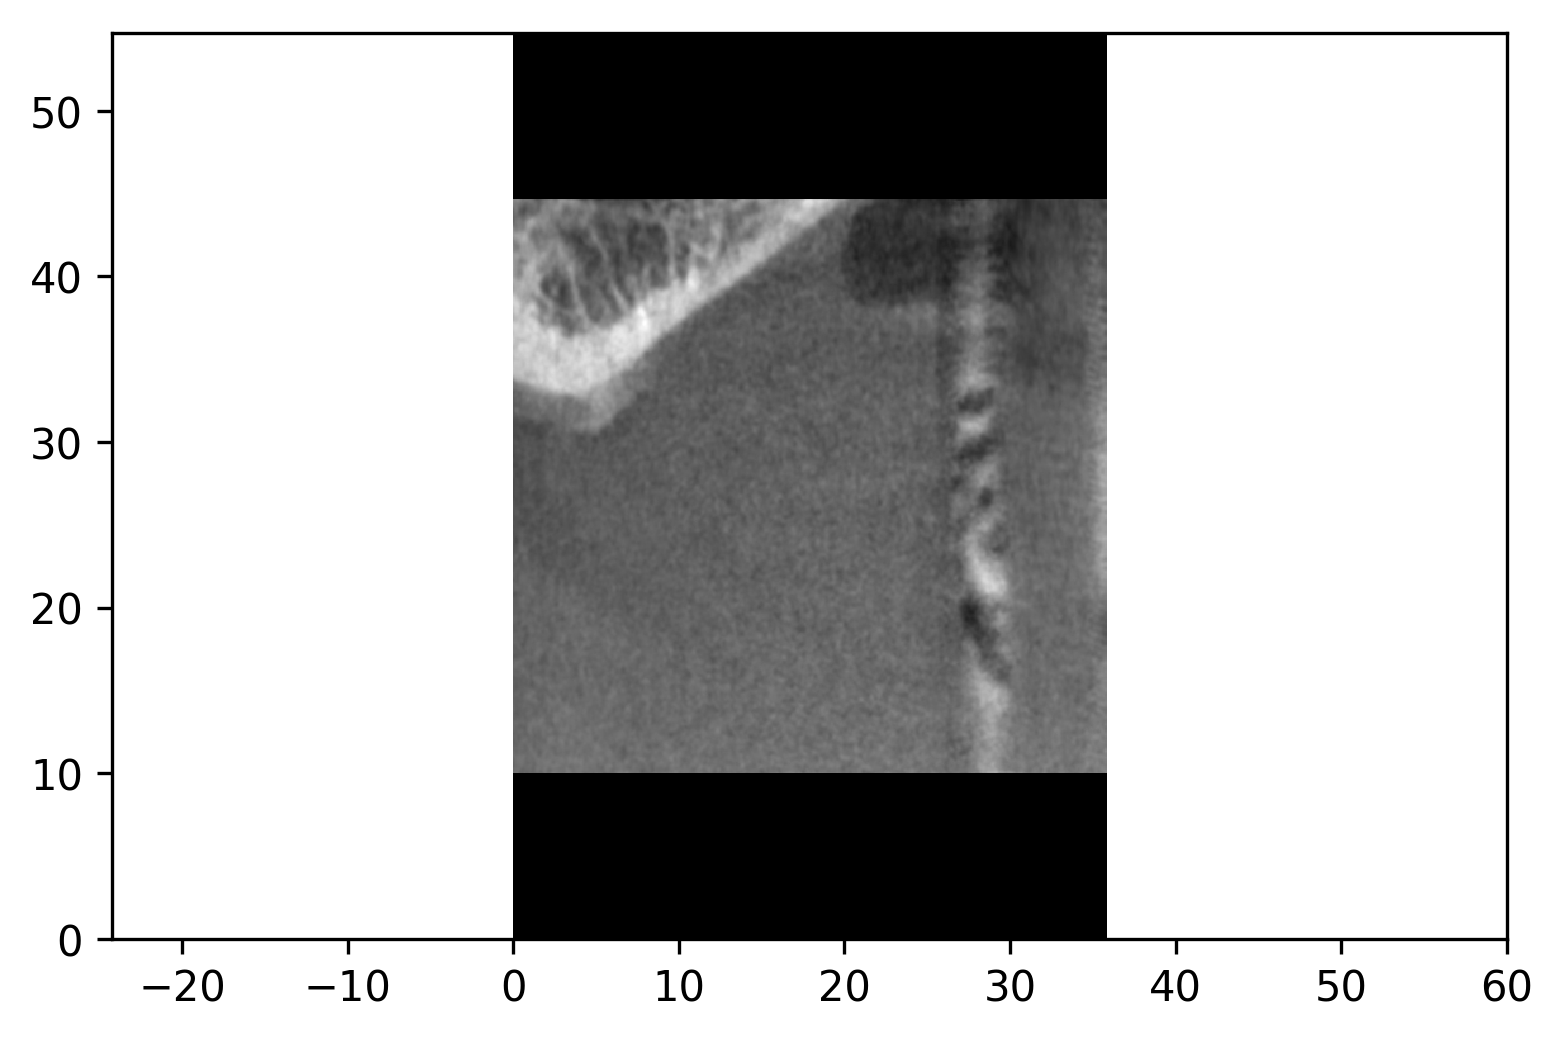

In [101]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(z, x, numpy.flipud(ArrayDicom[:, 80, :]))